In [1]:
from collections import deque
import os, os.path
import random
import numpy as np
import matplotlib.pyplot as plt
from libs.generate_boxes import *
from libs.utils import *
import time
import itertools
import math


In [2]:
st = time.time()

In [3]:
# boxes_multi,gt_pos = [[[10,10,20],[10,10,20],[10,20,20]]],[[[0,0,0],[0,10,0],[10,0,0]]]
boxes_multi,gt_pos = generation_3dbox(case_size=[[20,20,20]],min_s = 3, N_mdd=8, is_prediv='2h')
N_mdd = len(boxes_multi[0])
perm = list(itertools.permutations(range(N_mdd)))


env=Bpp3DEnv()
optimal_disp = []
for i in range(len(perm)):
    p = perm[i] # 순서 선택
    boxes = np.array(boxes_multi[0])[list(p)] # 박스 포장 그룹 선택
    # initialize 
    env.reset()
    upleft_l, used_boxes, pred_pos = [],[], []
    # 정해진 순서에 따라 하나씩 적재
    for box in boxes:
        w_upleft = whole_upleft(*box_cornel([0,0],20,20),box[0],box[1])
        for i,ul in enumerate(upleft_l):
            w_upleft += whole_upleft(*box_cornel([ul[0],ul[1]], used_boxes[i][0], used_boxes[i][1]),box[0],box[1])
        f_upleft = feasible_location(env.container,w_upleft,box[0],box[1],box[2],state_H=env.height,is2d=False)   
        if len(f_upleft) == 0:
            continue
        xyz = get_locxyz(f_upleft, env.container) #높이 반환
        fixted_xyz = fixed_pos(xyz) # 가능한 적재 위치 중 하나 선택
        xy = fixted_xyz[:2].astype('int')
        env.step(xy,box[0],box[1],box[2])
        
        pred_pos.append(fixted_xyz)
        used_boxes.append(box)
        upleft_l.append(xy)
        
    # 적재 완료
    #print(env.terminal_reward())
    if  env.terminal_reward() == 1:
        optimal_disp.append([used_boxes, pred_pos])
        break
    
print(N_mdd,time.time() - st)

10 1.4471385478973389


<IPython.core.display.Javascript object>


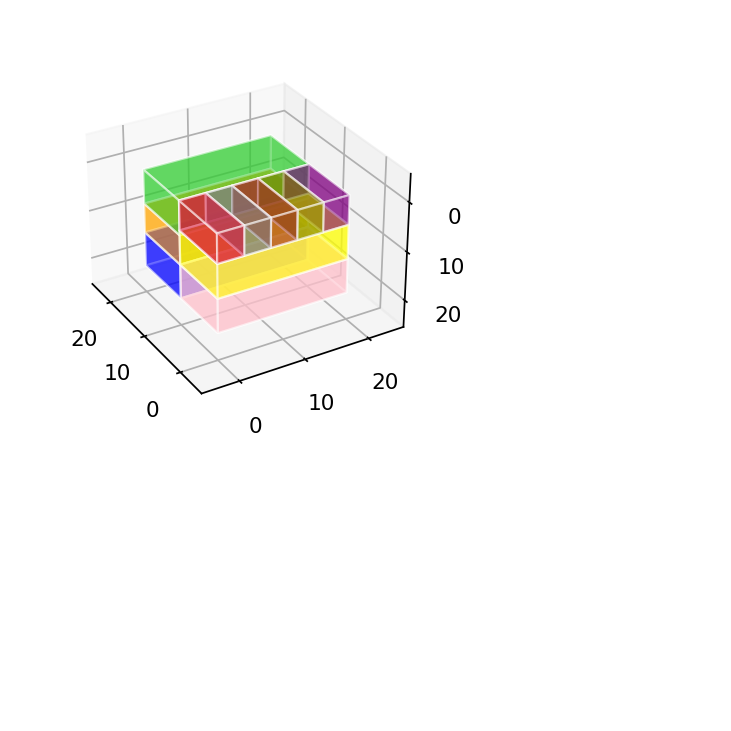

In [4]:
%matplotlib notebook
vis_box(optimal_disp[0][0],optimal_disp[0][1])